In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
from torch.utils.data import Dataset




--- 
 - 커스텀 데이터셋(Custom Dataset) 
   - 그런데 torch.utils.data.Dataset을 상속받아 직접 커스텀 데이터셋(Custom Dataset)을 만드는 경우도 있습니다. 
   - torch.utils.data.Dataset은 파이토치에서 데이터셋을 제공하는 추상 클래스입니다. 
   - Dataset을 상속받아 다음 메소드들을 오버라이드 하여 커스텀 데이터셋을 만들어보겠습니다. 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
batch_idx : 0

samples : 
    [tensor([[73., 80., 75.],
            [89., 91., 90.]]), tensor([[152.],
            [180.]])]

-------------------------------------------------------------------------------- 
epoch :    0/20 
cost : 37773.128906 
accuracy : 0.00 

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
batch_idx : 1

samples : 
    [tensor([[ 96.,  98., 100.],
            [ 73.,  66.,  70.]]), tensor([[196.],
            [142.]])]

-------------------------------------------------------------------------------- 
epoch :    0/20 
cost : 11841.866211 
accuracy : 0.37 

--------------------------------------------------------------------------------
-------------------------------------------------------------

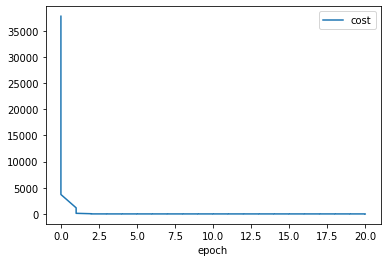

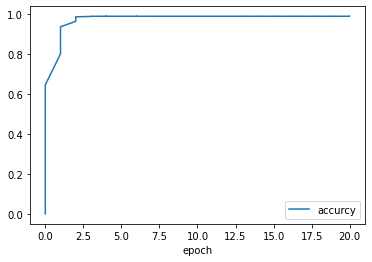


model : 
    Linear(in_features=3, out_features=1, bias=True) 
    weight    torch.Size([1, 3])
        tensor([[0.9014, 0.9214, 0.1886]])
    bias    torch.Size([1])
        tensor([0.4541])



In [2]:

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y


dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = nn.Linear(3, 1)
optimizer = optim.SGD(model.parameters(), lr=1e-5)
nb_epoches = 20
mu.plt_init()

for epoch in range(nb_epoches + 1):
    print("=" * 80)
    for batch_idx, samples in enumerate(dataloader):
        print("-" * 80)
        print("-" * 80)
        mu.log("batch_idx", batch_idx)
        mu.log("samples", samples)
        prediction = model(torch.FloatTensor(dataset.x_data))
        cost = F.mse_loss(prediction, torch.FloatTensor(dataset.y_data))
        accuracy = mu.get_regression_accuracy(prediction, torch.FloatTensor(dataset.y_data))
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("model", model)
